<a href="https://colab.research.google.com/github/mochiboba0405/pokemon-stat-analysis/blob/main/Statistical_Analysis_of_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS 22A PROJECT - STATISTICAL ANALYSIS OF POKÉMON**

<font color="lavender">**Team Members:</font>** Crystal Luong & Michelle Quach

<font color="lavender">**Last Updated:</font>** November 29th, 2022

<img src="https://cdn.custom-cursor.com/collections/129/cover-pokemon-preview.png" width=700>



________
# <font color="pink"> **INTRODUCTION**:</font> The goal of this project is the statistical analysis of Pokémons and their characteristics in game. 

**1) Two Sample T-test:**

The first hypothesis test is to determine if Pokémon fire and water types have the same attack damage. Pokémon’s attack information on the dataset provided is in relation to its base modifier/damage for their own normal attacks. A two-sample t-test was conducted in order to compare the means of each variable types; more specifically a two-tailed test as it helps show if one group is statistically lower or greater than the other group’s attack damage.  

The *null* $H_o$ and *alternative* $H_A$ hypotheses are the following:

- <font color="teal">**Null $H_o$**</font>: Both fire and water pokémon types have the **same** mean attack damage.
- <font color="teal">**Alternative $H_A$</font>**:  Both fire and water pokémon types **differ** in mean attack damage.

The code and data are visualized using histograms and two sample t-tests. From the t-statistic and p-value, it can be determined if the data is significant by an alpha value being less than 0.05. If the p-value is less than 0.05, then we can reject the null and see how the t-statistic surpasses the critical value in the negative or positive range.

<img src="https://i.ytimg.com/vi/gwmdHQLTVps/maxresdefault.jpg" width=400>

**2) One-way ANOVA:**   
The second hypothesis test is to determine if Type 2 Poison, Fairy, or Ghost have statistically same/different defense based on the given dataframe of Pokémons. The  one-way ANOVA test will be used to see if there is a difference somewhere between the three Type 2 Pokémons.
- <font color="teal">**Null $H_o$**</font>: Type 2 Poison, Fairy, and Ghost  Pokémons have the **same** mean defense.
- <font color="teal">**Alternative $H_A$</font>**: There is a **difference of mean defense somewhere** between Type 2 Poison, Fairy, and Ghost Pokémons.



The code and data are visualized using bar plots, box and whiskers plot, and F-critical value . From the F-statistic and p-value, it can be determined if the data is significant by an alpha value being less than 0.05. If the p-value is less than 0.05, then we can reject the null and see how the F-statistic surpasses the critical value in the negative or positive range.

<img src="https://i.pinimg.com/originals/77/58/f5/7758f51b4b68401c64d3402d1464902d.jpg" width=400>

**3) Correlation:**   
The third hypothesis test is to determine if Speed Attack and Speed Defense are correlated with each other based on the given dataframe of Pokémons. The correlation test will be used to see if there is relationship between the two numeric variables of speed attack and speed defense.
- <font color="teal">**Null $H_o$**</font>: Speed attack and speed defense for all Pokémons **do not correlate**.
- <font color="teal">**Alternative $H_A$</font>**: Speed attack and speed defense for all Pokémons **do correlate**.



The code and data are visualized using a scatter plot to show the relationship between speed attack and speed defense. The F-critical value. From the "r" value and and p-value, it can be determined if the data is significant by an alpha value being less than 0.05 and the Pearson correlation coefficient. If the p-value is less than 0.05, then we can reject the null and see how the "r" value has a negative or positive correlation.


<img src="https://i.pinimg.com/originals/80/7a/97/807a97aba060039b57928c39774e1c0d.jpg" width=400>





________
# <font color="pink"> **DATA**:</font>

 **1) Two Sample T-test Data**

In [ ]:
# Import Pandas Dataframe of the Pokémon Stats Provided
import pandas as pd

data_url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv'
poke_df = pd.read_csv(data_url)
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
poke_df.columns
# Use Type 1 and Attack for Two Sample T-test
# Use Type 2 and Defense for One-way ANOVA
# Use Sp. Atk and Sp. Def for Correlation

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# <font color="pink"> **Results of Two Sample T-test**:</font>

In [ ]:
from scipy.stats import ttest_ind

fire_pok = poke_df[poke_df['Type 1'] == 'Fire']
water_pok = poke_df[poke_df['Type 1'] == 'Water']
t_test = ttest_ind(water_pok['Attack'], fire_pok['Attack'])
# p-value:
print(f"P-Value: {round(t_test.pvalue,2)}")
# t-statistic:
print(f"T-Statistic:  {round(t_test.statistic,2)}")

P-Value: 0.03
T-Statistic:  -2.22


In [ ]:
fire_mean = fire_pok.Attack.mean()
print(f'The mean attack damage of Type 1 Fire Pokémon is {round(fire_mean,2)}')

water_mean = water_pok.Attack.mean()
print(f'The mean attack damage of Type 1 Water Pokémon is {round(water_mean,2)}')

The mean attack damage of Type 1 Fire Pokémon is 84.77
The mean attack damage of Type 1 Water Pokémon is 74.15


In [ ]:
df = len(fire_pok) + len(water_pok) - 2
print(f'The degree of freedom is {df}.')

The degree of freedom is 162.


In [ ]:
# The Welch's test - does not assume that the two pokemon types that the samples came from have equal variance
welch_t = ttest_ind(water_pok['Attack'], fire_pok['Attack'], equal_var = False)

# p-value:
print(f"P-Value: {round(welch_t.pvalue,2)}")

# t-statistic:
print(f"T-Statistic:  {round(welch_t.statistic,2)}")

# The p-value is less than 0.05 ; therefore, we reject the null hypothesis of Welch’s t-test and the attack damages do differ in type 1 water and fire Pokémons.

P-Value: 0.03
T-Statistic:  -2.21


#<font color="pink">**Conclusions:**</font>
The p-value is less than 0.05, we have sufficient evidence to  reject the null hypothesis of two-sample t-test and conclude that there is sufficient evidence to say that the Type 1 Fire and Water Pokémons differ in attack damage means. Water Pokémons do less damage than Fire types Pokémons.

**2) One-way ANOVA**

In [ ]:
fairy = poke_df[poke_df['Type 2'] == 'Fairy']
poison = poke_df[poke_df['Type 2'] == 'Poison']
ghost = poke_df[poke_df['Type 2'] == 'Ghost']

f_mean =  fairy.Defense.mean()
p_mean = poison.Defense.mean()
g_mean =  ghost.Defense.mean()

f_n = fairy['Defense'].count()
p_n = poison['Defense'].count()
g_n = ghost['Defense'].count()
print(f'Sample sizes {g_n, p_n, f_n}') # all different sample sizes

grand_mean = ((fairy['Defense'].sum() + poison['Defense'].sum() + ghost['Defense'].sum()) / (f_n + p_n + g_n))

print(f"Fairy Defense mean: {round(f_mean, 2)}")
print(f"Poison Defense mean: {round(p_mean, 2)}")
print(f"Ghost Defense mean: {round(g_mean, 2)}")
print(f"Grand mean: {round(grand_mean, 2)}")

Sample sizes (14, 34, 23)
Fairy Defense mean: 73.87
Poison Defense mean: 59.56
Ghost Defense mean: 82.29
Grand mean: 68.68


Sum of Squares between Different Sample Size Groups:   
$\large SS_{between}$ = $\large \sum{n_k (\bar{x}_k - \bar{x}_G})^2$  

In [ ]:
def squared_dev(values_list, mean):
  """ Function computes squared deviations from Pokémons means and grand mean """
  sq_dev = []
  for xi in values_list:
    sq_dev.append((xi - mean)**2)
  return sq_dev

xk = [f_mean, p_mean, g_mean]
nk = [f_n, p_n, g_n]
sq_dev = squared_dev(xk, grand_mean)
temp = []
for i in range(len(nk)): # i = 0,1,2,3
  temp.append(sq_dev[i]*nk[i])

ss_between = sum(temp)
print(f"SS_between: {ss_between}")

SS_between: 6039.701104324153


Sum of Squares for Within Groups:

$\large SS_{within}$ = $\Large \sum(x_i - \bar{x}_k)^2$  

In [ ]:
f_sq_dev = squared_dev(fairy.Defense.dropna(), f_mean)
p_sq_dev = squared_dev(poison.Defense.dropna(), p_mean)
g_sq_dev = squared_dev(ghost.Defense.dropna(), g_mean)

ss_within = sum(f_sq_dev) + sum(p_sq_dev) + sum(g_sq_dev)
print(f"SS_within: {ss_within}")

SS_within: 65771.8481914505


Degrees of Freedom for between groups and the degrees of freedom for within groups:  
$\large df_{between}$ = $\large k-1$

$\large df_{within}$ = $\large N-k$

In [ ]:
k = 3
df_between = k - 1

N = (len(fairy.Defense) + len(ghost.Defense) + len(poison.Defense))
df_within = N - k

print(f"df_between: {df_between}")
print(f"df_within: {df_within}")

df_between: 2
df_within: 68


$\large SS_{between} / df_{between}$ = $\large MS_{between}$  

<br>

$\large SS_{within} / df_{within}$ = $\large MS_{within}$ 

In [ ]:
ms_between = ss_between / df_between
ms_within = ss_within / df_within


print(f"MS_between: {ms_between}")
print(f"MS_within: {ms_within}")

MS_between: 3019.8505521620764
MS_within: 967.2330616389779


$F$ = $\Large\frac{MS_{between}}{MS_{within}}$ 

#<font color="pink">**Results of One-Way ANOVA**</font>

In [ ]:
F = ms_between / ms_within
print(f"F-statistic: {F}")

F-statistic: 3.1221539791505215


In [ ]:
F_crit = 3.13
if F > F_crit:
  print('Reject the null')
else:
  print('Retain the null')
# The null hypothesis was not rejected according to the F critical value found in https://www.stat.purdue.edu/~lfindsen/stat511/F_alpha_05.pdf. 
# There was not sufficient evidence to say that all three type 2 Pokémons do differ in defense.

Retain the null


# <font color="pink"> **Conclusion**:</font>
The mean defense points between Type 2 Fairy, Poison, and Ghost Pokémon Types do not differ. The F-value is lower than the F-critical value region, suggesting that there is not enough evidence to reject the null; therefore, the mean defense in the three Pokémon Types are the same.

**3) Correlation** 

# <font color="pink"> **Results of Correlation**:</font>

In [ ]:
from scipy import stats
pearson_corr, p_value = stats.pearsonr(poke_df['Sp. Atk'], poke_df['Sp. Def']) 
print(f'Pearson correlation between Speed Attack and Speed Defense is {round(pearson_corr,3)}')
print(f'The p-value is {p_value}')

Pearson correlation between Speed Attack and Speed Defense is 0.506
The p-value is 2.921295496747071e-53


In [ ]:
import numpy as np
x = poke_df['Sp. Atk']
y = poke_df['Sp. Def']
def pearsonr_ci(x, y, alpha=0.05):
    ''' Function computes Pearson correlation along with the confidence interval '''
    r, p = stats.pearsonr(x,y) # find the Pearson correlation coeffient and the p_value
    r_z = np.arctanh(r) # convert r value to z_score
    se = 1/np.sqrt(len(x)-3) # find the standard error
    z = stats.norm.ppf(1-alpha/2) # find the critical z-value for the alpha level
    lo_z, hi_z = r_z-z*se, r_z+z*se # calculate the confidience interval with the z_score
    lo, hi = np.tanh((lo_z, hi_z)) # convert the z_score confidence interval based on the r value. 
    return lo, hi # return the confidience interval low and high values.
CI_lo, CI_hi = pearsonr_ci(x, y)
print(f'The confidence interval of the Pearson correlation coefficient is ({round(CI_lo,4)}, {round(CI_hi,4)}).')

# print(f'The confidence interval of the Pearson correlation coefficient is ({round(CI_lo,4)}, {round(CI_hi,4)}).')

The confidence interval of the Pearson correlation coefficient is (0.4527, 0.5559).


# <font color="pink"> **Conclusion**:</font>
 The pearson coefficient (r) is between 0.4527 and 0.5559 according to the confidence interval. The calculated r is 0.506, which is between the range. This means that there is a positive direct relationship between speed attack and speed defense. The p-value is also less than 0.05, meaning we have enough evidence to reject the null hypothesis.



________
# <font color="pink"> **DATA VISUALIZED**:</font>


**1) Two Sample T-test Data**

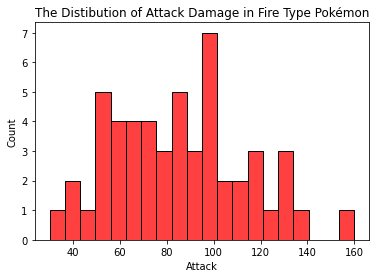

In [ ]:
# T-test for Distribution of Attack Damage in Fire Type Pokémon
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plot_title = f'The Distibution of Attack Damage in Fire Type Pokémon'
sns.histplot(fire_pok['Attack'], bins = 20, color = 'red').set_title(plot_title);

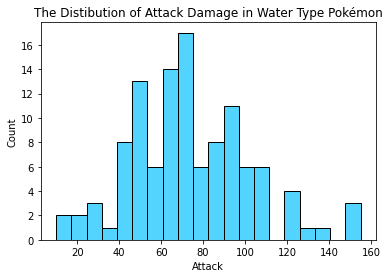

In [ ]:
# T-test for Distribution of Attack Damage in Water Type Pokémon
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plot_title = f'The Distibution of Attack Damage in Water Type Pokémon'
sns.histplot(water_pok['Attack'], bins = 20, color = '#1ac6ff').set_title(plot_title);

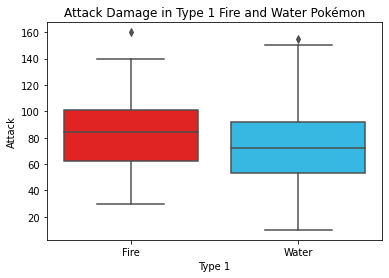

In [ ]:
# T-test Boxplot for Fire vs Water Type 1 Mean Attack Damage
bar = [fire_pok, water_pok]
bar_df = pd.concat(bar) # source = https://pandas.pydata.org/docs/user_guide/merging.html
import seaborn as sns
import matplotlib.pyplot as plt
my_colors = ["#ff0505", "#1ac6ff"]
sns.set_palette(my_colors)
sns.boxplot(x="Type 1", y="Attack", data=bar_df).set_title("Attack Damage in Type 1 Fire and Water Pokémon")
plt.show()

**2) One-way ANOVA**

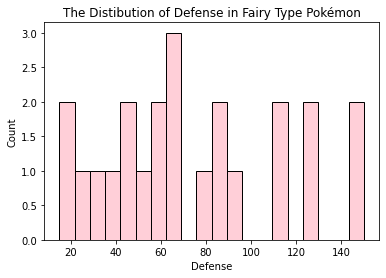

In [ ]:
# One-way ANOVA Distribution for Fairy, Poison, and Ghost Type 2 Mean Defense

plot_title = f'The Distibution of Defense in Fairy Type Pokémon'
sns.histplot(fairy['Defense'], bins = 20, color = 'pink').set_title(plot_title);

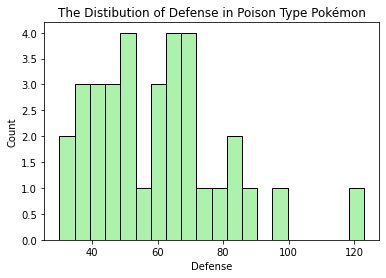

In [ ]:
plot_title = f'The Distibution of Defense in Poison Type Pokémon'
sns.histplot(poison['Defense'], bins = 20, color = 'lightgreen').set_title(plot_title);

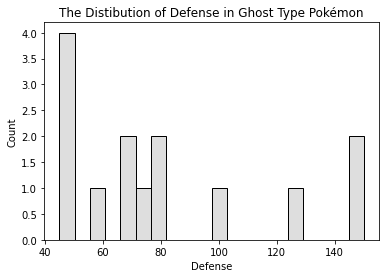

In [ ]:
plot_title = f'The Distibution of Defense in Ghost Type Pokémon'
sns.histplot(ghost['Defense'], bins = 20, color = 'lightgray').set_title(plot_title);

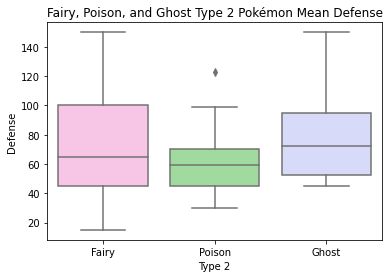

In [ ]:
# One-way ANOVA Box plot for Fairy, Poison, and Ghost Type 2 Mean Defense
fpg = [fairy, poison, ghost]
fpg_df = pd.concat(fpg) # source = https://pandas.pydata.org/docs/user_guide/merging.html
import seaborn as sns
import matplotlib.pyplot as plt
my_colors = ["#ffbde7", "#98e495","#d1d6ff"]
sns.set_palette(my_colors)
sns.boxplot(x="Type 2", y="Defense", data=fpg_df).set_title("Fairy, Poison, and Ghost Type 2 Pokémon Mean Defense")
plt.show()

**3) Correlation**

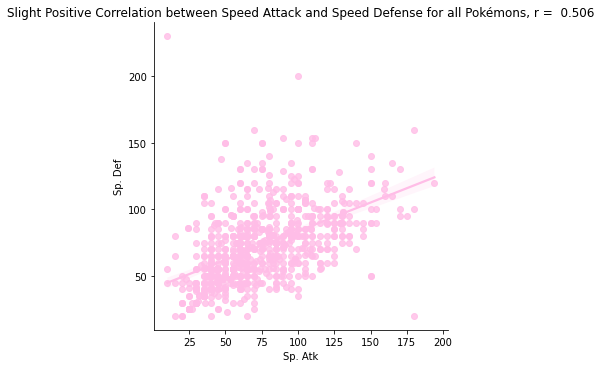

In [ ]:
sns.lmplot(
    data=poke_df,
    x ='Sp. Atk',
    y ='Sp. Def'
).set(title=f"Slight Positive Correlation between Speed Attack and Speed Defense for all Pokémons, r =  {round(pearson_corr, 3)}");



________
# <font color="pink"> **METHODS**:</font>
Description of the methods used in this report are as follows: 


  * For **Two Sample T-test**, we made different dataframes (using boolean) to only show Fire and Water Types. We then performed a t-test on the two dataframes according to the mean attack damage. We then visualized the data by creating a distribution and box plot for Type 1 Water and Fire to show the difference in mean attack damage. We used the p-value and t-critical value to determine if the null was rejected or not. The Welch's test was used to determine the homogeneity of variances.
  * For the **one-way ANOVA test**, we made three different dataframes (using boolean) to only show Type 2 Fairy, Poison, and Ghost Pokémons. We performed calculations for ANOVA (as seen in data) to determine if the defense in all three types differ. The visualization was three distribution plots and a box plot to compare the defense means.
  * For **correlation**, we used the original dataframe to pull out speed attack and speed defense for all Pokémons. We used a scipy to determine if there was a correlation using the "r" value. The p-value was also calculated to see if we should reject the null. The visualization was a scatterplot with a linear line to show the correlation between the two numeric values of speed attack and speed defense.


________
# <font color="pink"> **OVERALL CONCLUSION**:</font>
Statistical tests using python is helpful in determining if data is significant enough or not, such as for scientific hypothesis. The Pokémon analysis of a two sample t-test showed that Type 1 Fire and Water Pokémons had different mean attack damages, which Fire had a higher mean attack. One-way ANOVA showed that Type 2 Poison, Fairy, and Ghost Pokémons had the same mean defense. Correlation is an observational study that only shows an association or relationship between two numeric values. The speed attack and speed defense of Pokémons are positively correlated. Pokémon designers or developers may have made Pokémons to have the same speed for damage and defense; however, we would need an additional research to determine the truth. By using the Pokémon data for statistical tests, it serves as good practice for future hypotheses testing for our college careers, potential jobs, and research.